In [1]:
import numpy as np
import iris
import glob
import pandas as pd
import matplotlib.pyplot as plt
import cartopy as cart
import os
import glob

In [45]:
#--------------------------------------------------------------------------
# LOAD DATAFRAMES
#--------------------------------------------------------------------------

os.chdir('C:\\Users\\fb428\\OneDrive - University of Exeter\\Documents\\PhD\\papers\\manuscript3\\figures_and_data\\data_analysis')


names = glob.glob('local_data/*/*hourly_cleaned.csv')

dfs = []
df_names = []

for name in names:
    
    site_data = pd.read_csv(name)
    site_name = name.split('\\')[2].split('_')[0]
    
    site_data['station_name'] = site_name
    
    df_names.append(site_name)
    
    dfs.append(site_data)

#-----------------------TOAR-----------------------------------------

names_TOAR = glob.glob('TOARI_data/*/*daily.csv')

dfs_TOAR = []

for name in names_TOAR:
    
    site_data = pd.read_csv(name)
    site_name = name.split('\\')[2].split('_')[0]
    
    site_data['station_name'] = site_name
    df_names.append(site_name)
    
    site_data.rename(columns={'mean':'Ozone_avg'}, inplace=True)
    
    dfs_TOAR.append(site_data)

In [46]:
#--------------------------------------------------------------------------
# MAKE A DATAFRAME OF TIMES AND DATES
#--------------------------------------------------------------------------

## set up
month_len = (31,30,31,30,31,30,31,31,30,31,30,31)

#### make lists
days = list(range(1,31))
months = list(range(1,13))

### repeat correct amount
days_list = np.tile(days, len(months))
month_list = np.repeat(months, 30)

# flatten to create dataframes
df_new = pd.DataFrame(data = {'Day': days_list, 'Month': month_list})


In [47]:
def merge_dataframe(df_old, year):
    # merge with target data
    df_merge = pd.merge(df_new, df_old, on = ['Day', 'Month'], how = 'outer')
    df_merge['Year'] = [year]*len(df_merge)
    
    return df_merge

def count_nans(df):
    nan_count = df['Ozone_avg'].isna().sum()
    
    return nan_count

In [95]:
df_daily = [df.groupby(['Day', 'Month', 'Year', 'station_name'])['Ozone_avg'].mean().reset_index() for df in dfs]

In [97]:
complete_dfs = []
total_nans = []

i=0

for df in df_daily:
    
    ## merge dfs from same site
    
    site_dfs = []
    
    # get years that data was recorded
    years_list = np.unique(df.Year.values)
    
    if df.iloc[0,3] == df_daily[0].iloc[0,3]:
        years_list = years_list
    
    elif (years_list[0] <= 2014) & (years_list[-1] > 2014):
        years_list = [i for i in years_list if i <= 2014]
    
    ### loop over each of those years
    for year in years_list:
        print('Year: %s' % year)
        
        yearly_df = df[df.Year == year]
    
        # merge with list of all hours and days
        complete_df = merge_dataframe(yearly_df, year)
        
        #count nans
        nans = count_nans(complete_df)
        print('Total nans: %s / 360 (%s)' % (nans, nans*100/360))
        
        total_nans.append(nans)
        site_dfs.append(complete_df)
        
    df_full = pd.concat(site_dfs)
    complete_dfs.append(df_full.reset_index())


Year: 2014
Total nans: 310 / 360 (86.11111111111111)
Year: 2015
Total nans: 175 / 360 (48.611111111111114)
Year: 2009
Total nans: 321 / 360 (89.16666666666667)
Year: 2010
Total nans: 347 / 360 (96.38888888888889)
Year: 2011
Total nans: 223 / 360 (61.94444444444444)
Year: 2012
Total nans: 93 / 360 (25.833333333333332)
Year: 2009
Total nans: 304 / 360 (84.44444444444444)
Year: 2010
Total nans: 115 / 360 (31.944444444444443)
Year: 2011
Total nans: 77 / 360 (21.38888888888889)
Year: 2012
Total nans: 234 / 360 (65.0)
Year: 2014
Total nans: 92 / 360 (25.555555555555557)
Year: 2015
Total nans: 342 / 360 (95.0)
Year: 2016
Total nans: 246 / 360 (68.33333333333333)
Year: 2014
Total nans: 74 / 360 (20.555555555555557)
Year: 2014
Total nans: 30 / 360 (8.333333333333334)
Year: 2019
Total nans: 322 / 360 (89.44444444444444)
Year: 2020
Total nans: 34 / 360 (9.444444444444445)
Year: 2021
Total nans: 249 / 360 (69.16666666666667)
Year: 2022
Total nans: 135 / 360 (37.5)
Year: 2023
Total nans: 143 / 360 

In [98]:
for df in dfs_TOAR:
    
    ## merge dfs from same site
    
    site_dfs = []
    
    # get years that data was recorded
    years_list = np.unique(df.Year.values)
    
    if (years_list[0] < 2014) & (years_list[-1] > 2014):
        years_list = [i for i in years_list if i <= 2014]
    
    ### loop over each of those years
    for year in years_list:
        print('Year: %s' % year)
        
        yearly_df = df[df.Year == year]
    
        # merge with list of all hours and days
        complete_df = merge_dataframe(yearly_df, year)
        
        #count nans
        nans = count_nans(complete_df)
        print('Total nans: %s / 360 (%s)' % (nans, nans*100/360))
        
        total_nans.append(nans)
        site_dfs.append(complete_df)
        
    df_full = pd.concat(site_dfs)
    complete_dfs.append(df_full.reset_index())

Year: 2012
Total nans: 344 / 360 (95.55555555555556)
Year: 2013
Total nans: 11 / 360 (3.0555555555555554)
Year: 2014
Total nans: 9 / 360 (2.5)
Year: 2008
Total nans: 5 / 360 (1.3888888888888888)
Year: 2009
Total nans: 43 / 360 (11.944444444444445)
Year: 2010
Total nans: 52 / 360 (14.444444444444445)
Year: 2011
Total nans: 116 / 360 (32.22222222222222)
Year: 2012
Total nans: 17 / 360 (4.722222222222222)
Year: 2013
Total nans: 70 / 360 (19.444444444444443)
Year: 2014
Total nans: 30 / 360 (8.333333333333334)
Year: 2008
Total nans: 83 / 360 (23.055555555555557)
Year: 2009
Total nans: 15 / 360 (4.166666666666667)
Year: 2010
Total nans: 54 / 360 (15.0)
Year: 2011
Total nans: 16 / 360 (4.444444444444445)
Year: 2012
Total nans: 24 / 360 (6.666666666666667)
Year: 2013
Total nans: 26 / 360 (7.222222222222222)
Year: 2014
Total nans: 63 / 360 (17.5)
Year: 2008
Total nans: 61 / 360 (16.944444444444443)
Year: 2009
Total nans: 52 / 360 (14.444444444444445)
Year: 2010
Total nans: 59 / 360 (16.38888888

Total nans: 44 / 360 (12.222222222222221)
Year: 2007
Total nans: 40 / 360 (11.11111111111111)
Year: 2008
Total nans: 3 / 360 (0.8333333333333334)
Year: 2009
Total nans: 3 / 360 (0.8333333333333334)
Year: 2010
Total nans: 4 / 360 (1.1111111111111112)
Year: 2011
Total nans: 6 / 360 (1.6666666666666667)
Year: 1996
Total nans: 361 / 360 (100.27777777777777)
Year: 1997
Total nans: 198 / 360 (55.0)
Year: 1998
Total nans: 223 / 360 (61.94444444444444)
Year: 1999
Total nans: 8 / 360 (2.2222222222222223)
Year: 2000
Total nans: 63 / 360 (17.5)
Year: 2001
Total nans: 46 / 360 (12.777777777777779)
Year: 2002
Total nans: 63 / 360 (17.5)
Year: 2003
Total nans: 19 / 360 (5.277777777777778)
Year: 2004
Total nans: 21 / 360 (5.833333333333333)
Year: 2005
Total nans: 94 / 360 (26.11111111111111)
Year: 2006
Total nans: 267 / 360 (74.16666666666667)
Year: 2007
Total nans: 134 / 360 (37.22222222222222)
Year: 1998
Total nans: 61 / 360 (16.944444444444443)
Year: 1999
Total nans: 12 / 360 (3.3333333333333335)


Total nans: 27 / 360 (7.5)
Year: 2013
Total nans: 47 / 360 (13.055555555555555)
Year: 2014
Total nans: 43 / 360 (11.944444444444445)
Year: 1999
Total nans: 150 / 360 (41.666666666666664)
Year: 2000
Total nans: 2 / 360 (0.5555555555555556)
Year: 2001
Total nans: 3 / 360 (0.8333333333333334)
Year: 2002
Total nans: 2 / 360 (0.5555555555555556)
Year: 2003
Total nans: 10 / 360 (2.7777777777777777)
Year: 2004
Total nans: 21 / 360 (5.833333333333333)
Year: 2005
Total nans: 367 / 360 (101.94444444444444)
Year: 2006
Total nans: 131 / 360 (36.388888888888886)
Year: 2007
Total nans: 20 / 360 (5.555555555555555)
Year: 2008
Total nans: 29 / 360 (8.055555555555555)
Year: 2009
Total nans: 9 / 360 (2.5)
Year: 2010
Total nans: 17 / 360 (4.722222222222222)
Year: 2011
Total nans: 9 / 360 (2.5)
Year: 2012
Total nans: 16 / 360 (4.444444444444445)
Year: 2013
Total nans: 10 / 360 (2.7777777777777777)
Year: 2014
Total nans: 6 / 360 (1.6666666666666667)
Year: 2002
Total nans: 184 / 360 (51.111111111111114)
Yea

In [99]:
n = len(complete_dfs)

In [100]:
months = np.tile(['J','F','M','A','M','J','J','A','S','O','N','D'], 15)

In [110]:
complete_dfs[0].replace({'KM67':'Santarem'}, inplace=True)
complete_dfs[1].replace({'PV':'Porto Velho'}, inplace=True)

complete_dfs[11].replace({'Wintree':'Winnellie'}, inplace=True)
complete_dfs[24].replace({'San':'San Cristobal'}, inplace=True)

In [112]:
del complete_dfs[10]

In [114]:
del complete_dfs[15]

In [115]:
complete_dfs[15].tail()

,index,Day,Month,Unnamed: 0,Ozone_avg,urban,station_name,Lat,Lon,Year
2561,362,31,5,22963.0,6.695833,suburban,Guaymaral,4.784,-74.044,2014
2562,363,31,7,23024.0,9.591667,suburban,Guaymaral,4.784,-74.044,2014
2563,364,31,8,23055.0,18.033333,suburban,Guaymaral,4.784,-74.044,2014
2564,365,31,10,23116.0,8.220833,suburban,Guaymaral,4.784,-74.044,2014
2565,366,31,12,23177.0,NaN,suburban,Guaymaral,4.784,-74.044,2014


In [91]:
os.chdir('C:\\Users\\fb428\\OneDrive - University of Exeter\\Documents\\PhD\\papers\\manuscript3\\figures_and_data\\figure_making\\output_files')

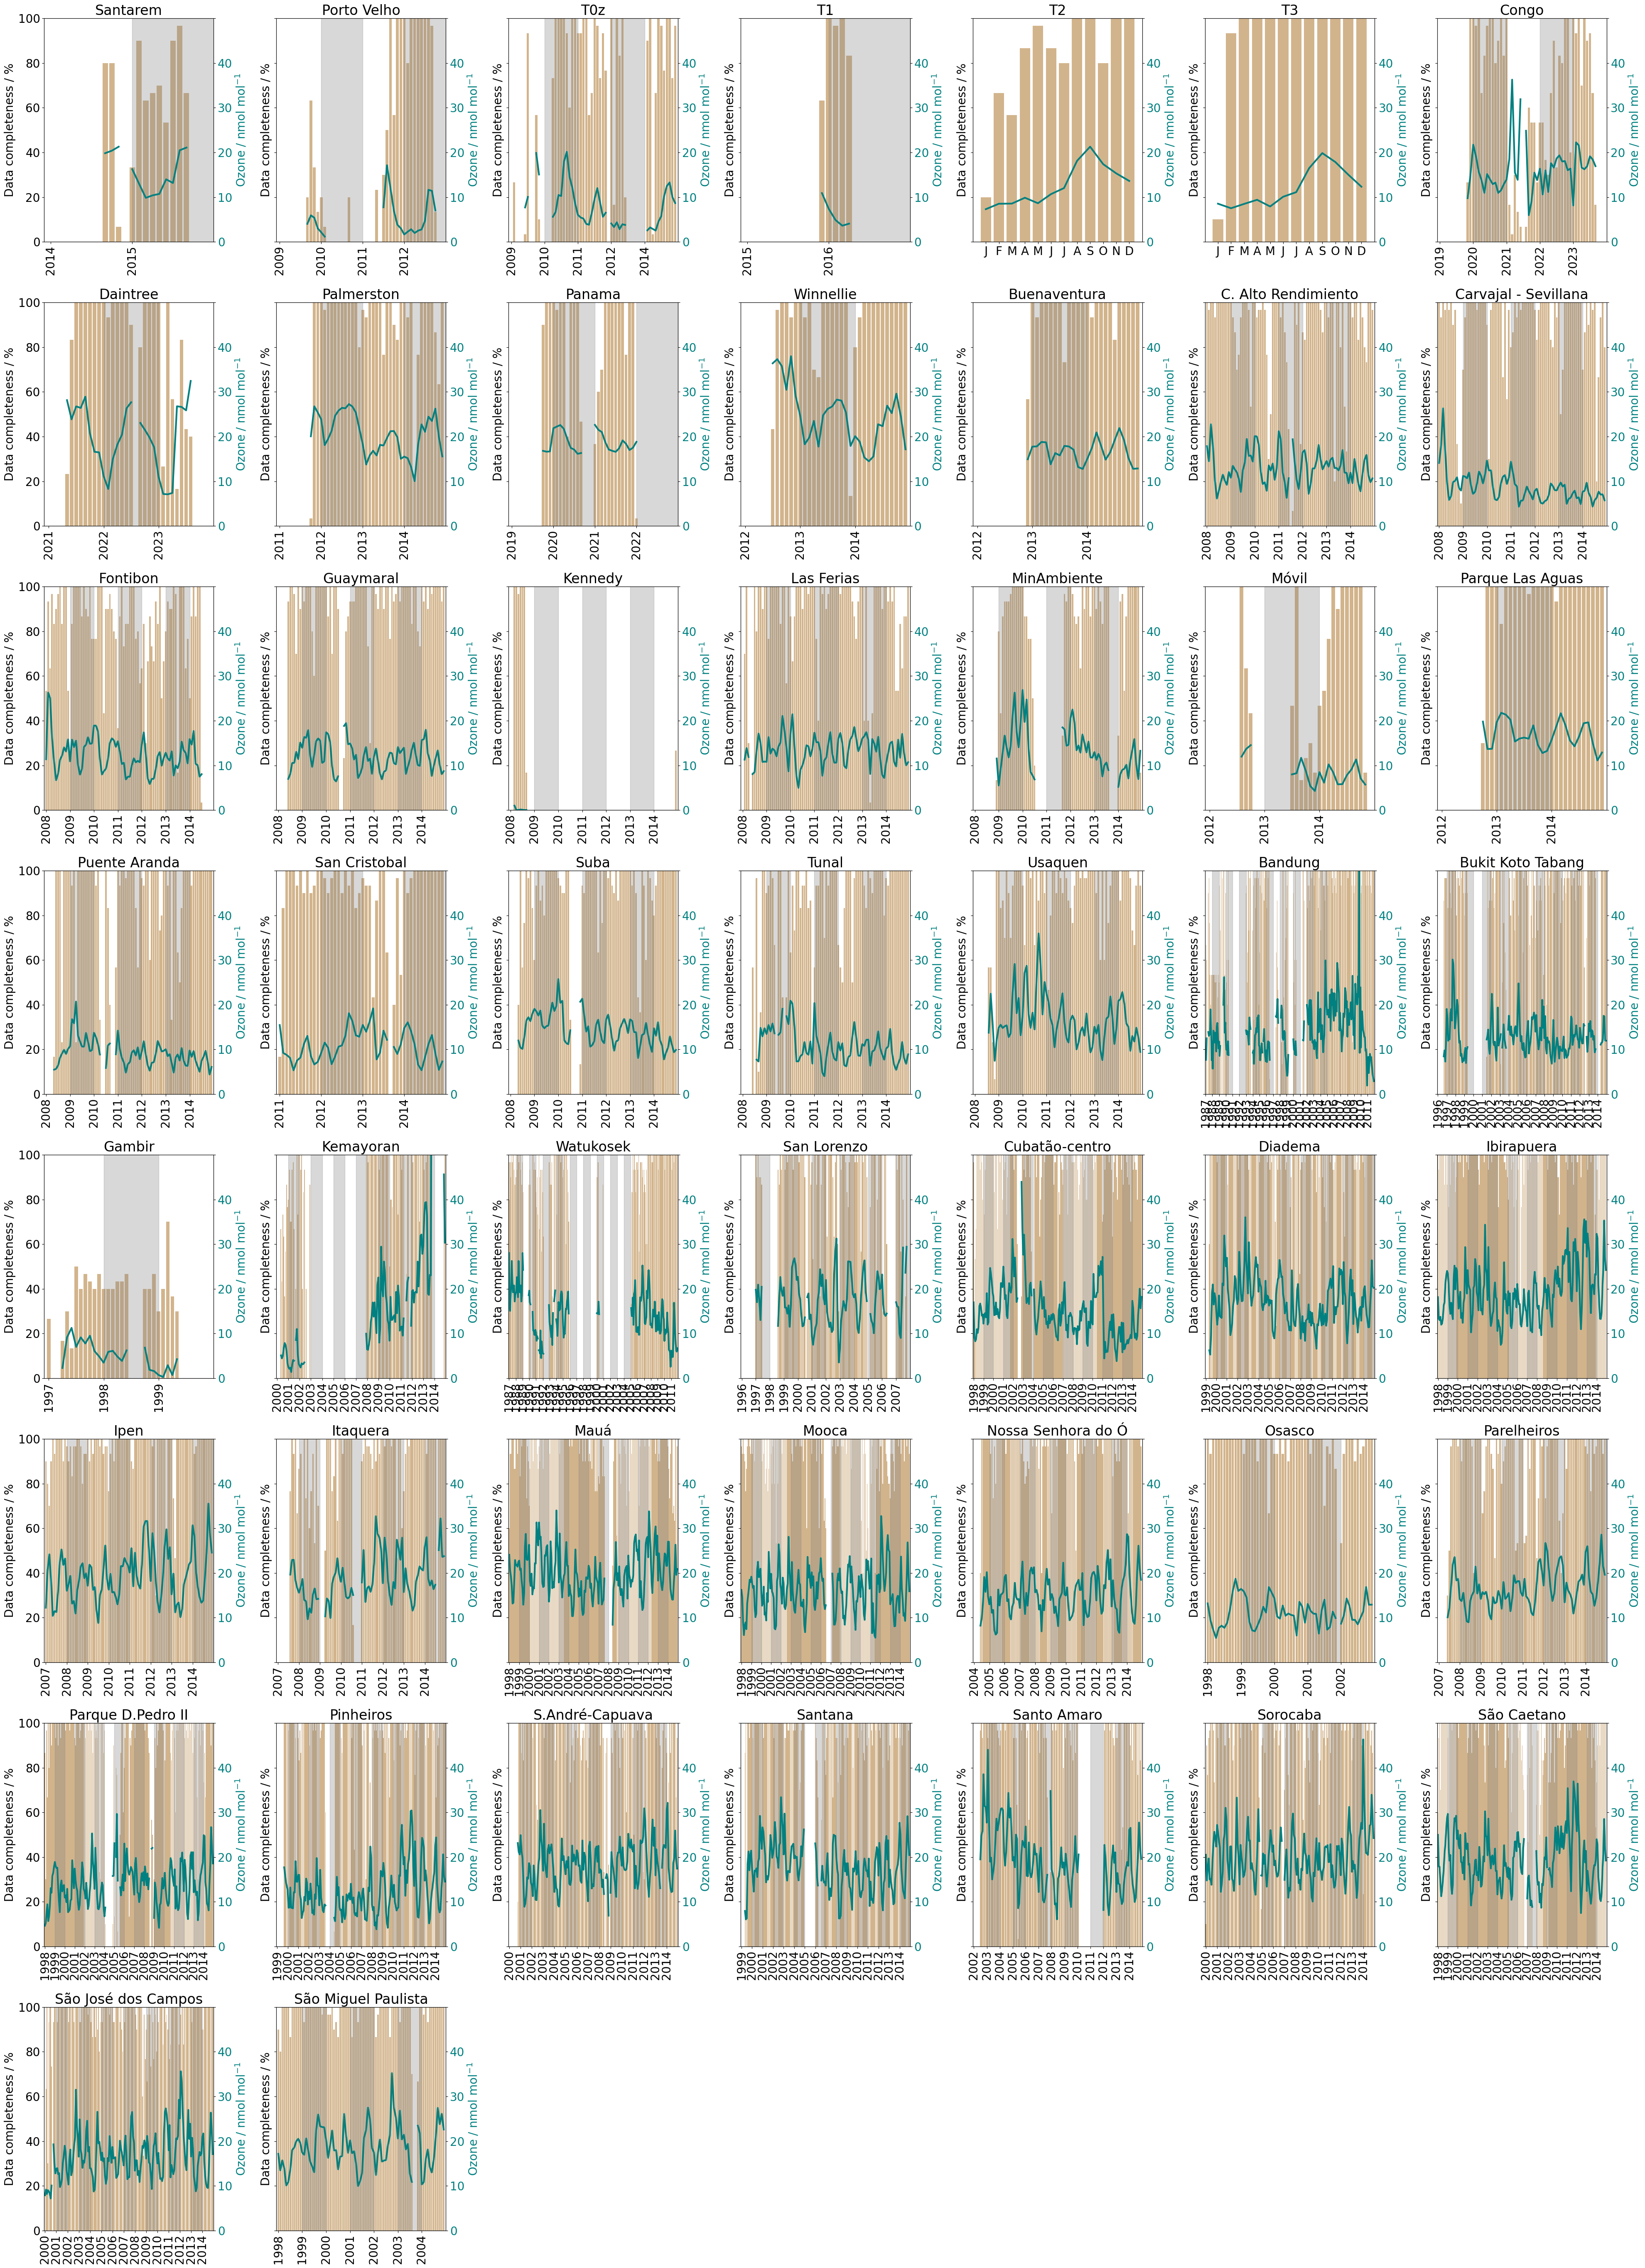

In [119]:
%%capture --no-display

fig, axs = plt.subplots(8,7,figsize=(40,55), sharey=True)    

plt.rcParams['font.size']=20

ax = axs.ravel()

for i in range(n-2):
    
    ax2 = ax[i].twinx()

#------------------------------------------- plot monthly means----------------------------------
    month_total = complete_dfs[i].groupby([ 'Year', 'Month']).agg({'Ozone_avg':['mean']})
    month_df = month_total.droplevel(1, axis = 1).reset_index()
    
    df_len = len(month_df)
    
    ax2.plot(range(0,df_len), month_df.Ozone_avg, color='teal', linewidth=3)
    
#------------------------------------------- aes----------------------------------    
   
    ax2.set_xlim(-1,df_len) 
    ax2.set_ylim(0,50)
    ax2.set_title(complete_dfs[i]['station_name'].dropna().unique()[0])
    ax2.set_ylabel('Ozone / nmol mol$^{-1}$', color='teal')
    ax2.set_yticklabels(range(0,50,10), color='teal')
        
#------------------------------------------- plot nan count----------------------------------    
    
    month_total = complete_dfs[i].groupby([ 'Year', 'Month']).agg({'Ozone_avg':['count']})
    month_count = month_total.droplevel(1, axis = 1).reset_index()
    
    ax[i].bar(range(0,df_len), month_count.Ozone_avg*100/30, color='tan')
    
#------------------------------------------- aes---------------------------------- 
    
    ax[i].set_ylabel('Data completeness / %')
    ax[i].set_ylim(0,100)
    
    if df_len <=12:
        ax2.set_xticks(range(0,df_len))
        ax2.set_xticklabels(months[0:df_len])
        
    else:
        ax2.set_xticks(range(0,df_len,12))
        ax[i].tick_params(axis='x', rotation=90)
        ax2.set_xticklabels(month_df['Year'].values[::12])
        
    x_values = np.repeat(list(range(0,220,12)),2)
    ax[i].fill_between(x_values[1::], np.tile([0,0,130,130], 10)[:-3], color='grey', alpha=0.3, zorder=100)  

fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
fig.delaxes(ax[-3])
fig.delaxes(ax[-4])
fig.delaxes(ax[-5])

plt.tight_layout()

plt.savefig('figures/daily_nans.png', dpi=300)